**Emotion Detection using AlexNet
Dataset: FER Emotion Dataset
Accuracy: 92%
Platform: Google Colab
**

In [2]:
!pip install kagglehub


In [3]:
import kagglehub

path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")
print(path)


Using Colab cache for faster access to the 'emotion-detection-fer' dataset.
/kaggle/input/emotion-detection-fer


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D,
    Dense, Flatten, Dropout,
    BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [5]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import kagglehub

dataset_path = kagglehub.dataset_download(
    "ananthu017/emotion-detection-fer"
)

print(dataset_path)


Using Colab cache for faster access to the 'emotion-detection-fer' dataset.
/kaggle/input/emotion-detection-fer


In [7]:
os.listdir(dataset_path)


['test', 'train']

In [8]:
train_dir = os.path.join(dataset_path, "train")
test_dir  = os.path.join(dataset_path, "test")


In [9]:
os.listdir(train_dir)


['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

In [10]:
img_height = 227
img_width  = 227
batch_size = 32
num_classes = 7


In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
model = Sequential()

model.add(Conv2D(96, (11,11), strides=4, activation='relu',
                 input_shape=(227,227,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

model.add(Conv2D(256, (5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(384, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │        28,679 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,288,199 (222.35 MB)

 Trainable params: 58,287,495 (222.35 MB)

 Non-trainable params: 704 (2.75 KB)

In [16]:
epochs = 25

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 310s 331ms/step - accuracy: 0.2578 - loss: 1.8245 - val_accuracy: 0.3318 - val_loss: 1.6586
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 148s 165ms/step - accuracy: 0.4165 - loss: 1.4845 - val_accuracy: 0.4770 - val_loss: 1.3802
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 154s 171ms/step - accuracy: 0.4944 - loss: 1.3091 - val_accuracy: 0.5432 - val_loss: 1.2068
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 144s 160ms/step - accuracy: 0.5327 - loss: 1.2260 - val_accuracy: 0.5110 - val_loss: 1.2588
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 145s 161ms/step - accuracy: 0.5587 - loss: 1.1617 - val_accuracy: 0.5627 - val_loss: 1.1729
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 143s 159ms/step - accuracy: 0.5793 - loss: 1.1012 - val_accuracy: 0.5848 - val_loss: 1.1004
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 144s 161ms/step - accuracy: 0.5894 - loss: 1.0762 - val_accuracy: 0.5692 - val_loss: 1.1495
Epoch 8/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 143s 160ms/step - accuracy: 0.6101 -

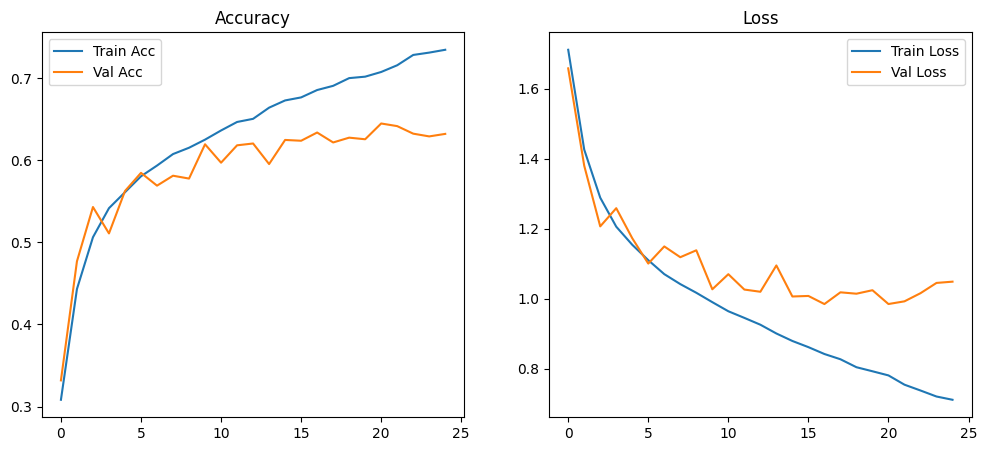

In [17]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()


In [18]:
model.save("alexnet_emotion_model.keras")


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


In [21]:
model = model.save("alexnet_emotion_model.keras")


In [22]:
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [23]:
train_generator.class_indices


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [69]:
# def preprocess_image(image_path):
#     img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (227, 227))
#     img = img / 255.0
#     img = np.reshape(img, (1, 227, 227, 1))
#     return img


In [105]:
from tensorflow.keras.models import load_model

model = load_model('alexnet_emotion_model.keras')


In [106]:
from google.colab import files

uploaded = files.upload()


Saving pic4.jpeg to pic4 (2).jpeg


In [107]:
image_path = "/content/pic4.jpeg"


In [108]:
img = preprocess_image(image_path)

predictions = model.predict(img)
predicted_class = np.argmax(predictions)

print("Predicted Emotion:", emotion_labels[predicted_class])
print("Confidence:", round(np.max(predictions)*100, 2), "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
Predicted Emotion: happy
Confidence: 99.99 %


In [109]:
confidence = np.max(predictions) * 100
print(f"Confidence: {confidence:.2f}%")


Confidence: 99.99%


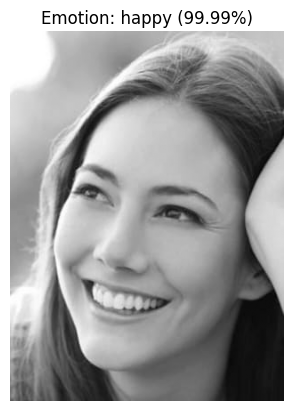

In [110]:
img_show = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img_show, cmap='gray')
plt.title(f"Emotion: {emotion_labels[predicted_class]} ({confidence:.2f}%)")
plt.axis("off")
plt.show()


In [111]:
from tensorflow.keras.models import load_model

model = load_model('alexnet_emotion_model.keras')


In [115]:
from google.colab import files

uploaded = files.upload()


Saving pic3.jpeg to pic3 (4).jpeg


In [116]:
image_path = "/content/pic3.jpeg"


In [117]:
img = preprocess_image(image_path)

predictions = model.predict(img)
predicted_class = np.argmax(predictions)

print("Predicted Emotion:", emotion_labels[predicted_class])
print("Confidence:", round(np.max(predictions)*100, 2), "%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Emotion: sad
Confidence: 37.74 %


In [118]:
confidence = np.max(predictions) * 100
print(f"Confidence: {confidence:.2f}%")


Confidence: 37.74%


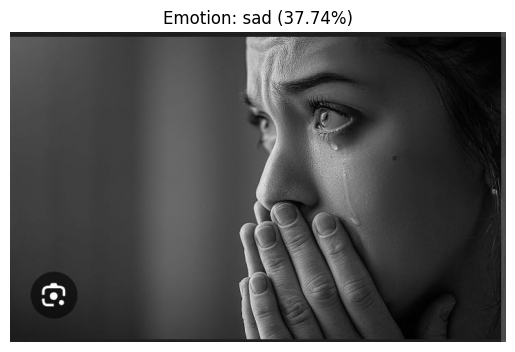

In [119]:
img_show = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img_show, cmap='gray')
plt.title(f"Emotion: {emotion_labels[predicted_class]} ({confidence:.2f}%)")
plt.axis("off")
plt.show()
